In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import hashlib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import statsmodels.api as sm
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Activation, Flatten
from keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [105]:
# Data Wrangling
cfpd_survey_data_url = 'https://raw.githubusercontent.com/jeydion/capstone_project_2/master/NFWBS_PUF_2016_data.csv'
df = pd.read_csv(cfpd_survey_data_url, index_col =0)
df.head(10)

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,4,...,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,1,...,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,5,...,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,4,...,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0,0,0,0,0,1,-2,-1,-1,3,3,2,1,1,1,8,3,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,4,3,3,1,3,3,3,3,3,3,3,3,4,...,-2,65,75,2,1,0,0,0,0,2,0,1,0,1,0,0,0,0,0,-2,0,5,2,4,2,3,1,5,7,1,1,2,4,0,0,1,0,4,1,4.260668
10910,1,3,5,7,5,67,5,1,1,1,1,1,2,5,2,2,57,4,4,4,4,3,4,4,4,4,1,6,5,4,1,5,4,3,4,5,3,5,5,4,...,-2,71,10,4,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,1,3,2,4,4,1,1,2,7,1,1,2,3,0,0,0,0,2,0,0.760061
11079,1,3,5,4,7,51,1,3,2,3,3,3,3,2,1,4,54,4,4,3,3,3,4,4,5,4,3,5,5,3,1,4,3,3,4,5,3,5,5,5,...,-2,63,70,4,0,0,2,1,1,4,0,0,0,1,0,0,0,0,0,-2,0,5,3,3,4,4,2,5,7,1,1,2,4,0,0,1,1,3,0,1.370522
7741,1,3,2,2,2,47,1,2,4,3,3,3,3,3,3,3,35,2,3,3,2,2,4,2,4,3,3,4,2,3,0,4,3,3,2,1,1,1,1,2,...,-2,71,0,2,1,0,0,0,0,7,0,0,0,0,0,0,1,0,0,-2,0,5,2,4,1,1,2,3,4,4,1,2,4,0,0,0,0,3,0,1.193365
8303,1,3,7,7,7,43,4,5,2,5,5,2,5,5,4,4,58,4,5,5,4,3,5,4,4,4,5,4,3,3,0,4,4,4,3,4,3,4,3,4,...,-2,70,50,2,0,0,0,1,1,4,0,0,0,1,0,0,0,0,0,-2,-1,-1,3,3,1,3,2,4,7,1,1,3,7,0,0,0,1,3,0,2.497838


In [106]:
df.describe()

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,3.285737,2.771505,3.071942,2.335940,3.388176,2.029246,2.687989,50.719112,3.608383,3.535033,3.241164,3.316078,3.049578,3.762277,3.695809,3.739443,3.626056,2.670003,4.674069,4.213481,3.607288,0.621364,3.674226,3.625117,3.672036,3.254301,4.533000,3.807163,3.535033,4.204410,4.36894,...,15.361589,39.942759,64.409134,3.497498,0.478886,0.155145,0.143572,0.135283,0.196591,6.063341,0.083829,0.393338,0.089459,0.062715,0.041914,0.046450,0.042227,0.296997,0.018142,-0.912418,0.189084,4.471067,4.450422,2.549891,3.160776,1.622771,1.475759,2.522990,5.510635,2.042071,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,1.052283,1.269624,1.177299,1.178593,1.267983,1.105532,1.135752,12.656921,0.945685,1.055525,1.034077,0.964748,1.022757,0.953039,0.993908,0.891055,0.960579,0.928350,1.283933,0.904444,0.925751,0.509003,1.043434,0.949566,0.923921,1.027885,0.924622,1.084656,1.583223,1.071351,1.48672,...,29.064899,33.252065,36.608928,1.220841,0.659390,0.467310,0.439024,0.418555,0.521085,12.917475,0.277152,0.488529,0.285427,0.242469,0.200409,0.210474,0.201123,0.456971,0.133475,1.703731,0.411092,1.185524,2.120741,1.046740,1.178349,1.077631,0.499451,1.223571,2.671075,1.393808,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-3.000000,-3.000000,-2.000000,-1.000000,-1.000000,-1.000000,-3.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Columns: 216 entries, sample to finalwt
dtypes: float64(2), int64(214)
memory usage: 10.6 MB


In [0]:
# Data Cleaning
# This data set has already been cleaned but the CFPB to the needs of this project. From this point feature selection and and handling are next. 

In [0]:
# Feature Engineering
# The features that were chosen were based on the original problem being solved. There are 215 variables in the original dataset.
# Though all could be used to gain a more precise understanding of Financial Well-Being, those variables won't go far enough. 
# There are no variables directly tied to other aspects of the human experience /(psychological, body and mental health, socio-economic 
# descriptors of the participants place of residence). The features chosen specifically relate to the participant's score on the financial
# questions and their decriptive or panel data. This refers to the participants' race, age, generation, household size and income and 
# employment status. 

In [0]:
dc_df = df[["FWBscore", "FSscore", "FS1_1", "FS1_2", "FS1_3", "FS1_4", "FS1_5", "FS1_6", "FS1_7", "FS2_1", "FS2_2", "FS2_3", "SUBKNOWL1", "FK1correct",
            "FK2correct", "FK3correct", "KHscore", "KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", "KH6correct",
            "KH7correct", "KH8correct", "KH9correct", "FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", 
            "FINSOC2_7", "KIDS_NoChildren", "KIDS_1", "KIDS_2", "KIDS_3", "KIDS_4", "EMPLOY", "EMPLOY1_1", "EMPLOY1_2", "EMPLOY1_3", "EMPLOY1_4", 
            "EMPLOY1_5", "EMPLOY1_6", "EMPLOY1_7", "EMPLOY1_8", "agecat", "generation", "PPEDUC", "PPETHM", 
            "PPGENDER", "PPHHSIZE", "PPINCIMP", "fpl", "PPMARIT"]]

In [111]:
dc_df.describe()

,FWBscore,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,fpl,PPMARIT
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,56.034094,50.719112,3.608383,3.535033,3.241164,3.316078,3.049578,3.762277,3.695809,3.739443,3.626056,2.670003,4.674069,0.862997,0.77385,0.869409,-0.056935,0.604942,0.843603,0.671880,0.827964,0.747732,0.918361,0.439318,0.350798,0.899124,0.34157,0.649828,0.360651,0.604160,0.741789,0.398811,0.416171,0.478886,0.155145,0.143572,0.135283,0.196591,6.063341,0.083829,0.393338,0.089459,0.062715,0.041914,0.046450,0.042227,0.296997,4.450422,2.549891,3.160776,1.622771,1.475759,2.522990,5.510635,2.658899,2.042071
std,14.154676,12.656921,0.945685,1.055525,1.034077,0.964748,1.022757,0.953039,0.993908,0.891055,0.960579,0.928350,1.283933,0.343878,0.41837,0.336979,0.814936,0.488901,0.363259,0.469566,0.377441,0.434348,0.273835,0.496343,0.477257,0.301188,0.48115,0.483251,0.487340,0.495108,0.445127,0.496670,0.499893,0.659390,0.467310,0.439024,0.418555,0.521085,12.917475,0.277152,0.488529,0.285427,0.242469,0.200409,0.210474,0.201123,0.456971,2.120741,1.046740,1.178349,1.077631,0.499451,1.223571,2.671075,0.656944,1.393808
min,-4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,-2.053000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,48.000000,42.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,1.000000,1.00000,1.000000,-0.570000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000
50%,56.000000,50.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,1.000000,1.00000,1.000000,-0.188000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000,6.000000,3.000000,1.000000
75%,65.000000,57.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,1.000000,1.00000,1.000000,0.712000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000

In [112]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Data columns (total 56 columns):
FWBscore           6394 non-null int64
FSscore            6394 non-null int64
FS1_1              6394 non-null int64
FS1_2              6394 non-null int64
FS1_3              6394 non-null int64
FS1_4              6394 non-null int64
FS1_5              6394 non-null int64
FS1_6              6394 non-null int64
FS1_7              6394 non-null int64
FS2_1              6394 non-null int64
FS2_2              6394 non-null int64
FS2_3              6394 non-null int64
SUBKNOWL1          6394 non-null int64
FK1correct         6394 non-null int64
FK2correct         6394 non-null int64
FK3correct         6394 non-null int64
KHscore            6394 non-null float64
KH1correct         6394 non-null int64
KH2correct         6394 non-null int64
KH3correct         6394 non-null int64
KH4correct         6394 non-null int64
KH5correct         6394 non-null int64
KH6correct         6394 non-n

In [0]:
# Data Cleaning
# First need to delete all rows with nonsubstantive values. This is any row with values -4, -1, and 99. These rows won't be used because they won't have
# a complete data point for analysis. This should result in less than 1% of the data being removed. 

In [114]:
nsvalues = {
    -4: np.nan,
    -1: np.nan,
    99: np.nan
}
dc_df.replace(nsvalues, inplace=True)
# df.loc[:, (df == -4)] = np.nan
dc_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Data columns (total 56 columns):
FWBscore           6389 non-null float64
FSscore            6386 non-null float64
FS1_1              6382 non-null float64
FS1_2              6383 non-null float64
FS1_3              6382 non-null float64
FS1_4              6384 non-null float64
FS1_5              6383 non-null float64
FS1_6              6384 non-null float64
FS1_7              6386 non-null float64
FS2_1              6380 non-null float64
FS2_2              6380 non-null float64
FS2_3              6380 non-null float64
SUBKNOWL1          6342 non-null float64
FK1correct         6394 non-null float64
FK2correct         6394 non-null float64
FK3correct         6394 non-null float64
KHscore            6394 non-null float64
KH1correct         6394 non-null float64
KH2correct         6394 non-null float64
KH3correct         6394 non-null float64
KH4correct         6394 non-null float64
KH5correct         6394 non-

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [115]:
dc_df.dropna(inplace=True)
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7740 to 8516
Data columns (total 56 columns):
FWBscore           5670 non-null float64
FSscore            5670 non-null float64
FS1_1              5670 non-null float64
FS1_2              5670 non-null float64
FS1_3              5670 non-null float64
FS1_4              5670 non-null float64
FS1_5              5670 non-null float64
FS1_6              5670 non-null float64
FS1_7              5670 non-null float64
FS2_1              5670 non-null float64
FS2_2              5670 non-null float64
FS2_3              5670 non-null float64
SUBKNOWL1          5670 non-null float64
FK1correct         5670 non-null float64
FK2correct         5670 non-null float64
FK3correct         5670 non-null float64
KHscore            5670 non-null float64
KH1correct         5670 non-null float64
KH2correct         5670 non-null float64
KH3correct         5670 non-null float64
KH4correct         5670 non-null float64
KH5correct         5670 non-n

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
dc_df.head(10)

,FWBscore,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,fpl,PPMARIT
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7740,51.0,43.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,2.0,5.0,1.0,1.0,1.0,-0.570,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,1.0,2.0,6.0,3.0,3.0
13699,49.0,42.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,1.0,1.0,1.0,-0.188,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,1.0,3.0,6.0,3.0,3.0
7375,49.0,42.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,1.0,-1.900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,3.0,1.0,5.0,7.0,3.0,1.0
10910,67.0,57.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,6.0,1.0,1.0,1.0,0.242,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,1.0,1.0,2.0,7.0,3.0,1.0
11079,51.0,54.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,1.0,1.0,1.0,1.267,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,4.0,2.0,5.0,7.0,3.0,1.0
7741,47.0,35.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,-0.909,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,1.0,1.0,2.0,3.0,4.0,3.0,4.0
8303,43.0,58.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,1.0,1.0,0.0,-0.188,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,3.0,2.0,4.0,7.0,3.0,1.0
13180,78.0,66.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,2.0,5.0,1.0,0.0,1.0,-0.188,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,1.0,5.0,6.0,3.0,1.0
10127,62.0,57.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,1.0,1.0,1.0,0.242,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,4.0,1.0,2.0,2.0,8.0,3.0,1.0


In [0]:
dw_df = dc_df.copy()

In [0]:
# One-Hot Encode discrete variables
encoder = OneHotEncoder(categories='auto')

cat_df = dw_df[["FS1_1", "FS1_2", "FS1_3", "FS1_4", "FS1_5", "FS1_6", "FS1_7", "FS2_1", "FS2_2", "FS2_3", "SUBKNOWL1",  "KHscore",  "KIDS_1", "KIDS_2", "KIDS_3", "KIDS_4", "EMPLOY1_1", "EMPLOY1_2", "EMPLOY1_3", "EMPLOY1_4",  "EMPLOY1_5", "EMPLOY1_6", "EMPLOY1_7", "EMPLOY1_8", "agecat", "generation", "PPEDUC", "PPETHM",  "PPGENDER", "PPHHSIZE", "PPINCIMP", "fpl", "PPMARIT"
]]

In [119]:
cat_df = cat_df.astype(str)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7740 to 8516
Data columns (total 33 columns):
FS1_1         5670 non-null object
FS1_2         5670 non-null object
FS1_3         5670 non-null object
FS1_4         5670 non-null object
FS1_5         5670 non-null object
FS1_6         5670 non-null object
FS1_7         5670 non-null object
FS2_1         5670 non-null object
FS2_2         5670 non-null object
FS2_3         5670 non-null object
SUBKNOWL1     5670 non-null object
KHscore       5670 non-null object
KIDS_1        5670 non-null object
KIDS_2        5670 non-null object
KIDS_3        5670 non-null object
KIDS_4        5670 non-null object
EMPLOY1_1     5670 non-null object
EMPLOY1_2     5670 non-null object
EMPLOY1_3     5670 non-null object
EMPLOY1_4     5670 non-null object
EMPLOY1_5     5670 non-null object
EMPLOY1_6     5670 non-null object
EMPLOY1_7     5670 non-null object
EMPLOY1_8     5670 non-null object
agecat        5670 non-null object
generation    5

In [120]:
#encoder.fit_transform(cat_df)
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,FS1_1_1.0,FS1_1_2.0,FS1_1_3.0,FS1_1_4.0,FS1_1_5.0,FS1_2_1.0,FS1_2_2.0,FS1_2_3.0,FS1_2_4.0,FS1_2_5.0,FS1_3_1.0,FS1_3_2.0,FS1_3_3.0,FS1_3_4.0,FS1_3_5.0,FS1_4_1.0,FS1_4_2.0,FS1_4_3.0,FS1_4_4.0,FS1_4_5.0,FS1_5_1.0,FS1_5_2.0,FS1_5_3.0,FS1_5_4.0,FS1_5_5.0,FS1_6_1.0,FS1_6_2.0,FS1_6_3.0,FS1_6_4.0,FS1_6_5.0,FS1_7_1.0,FS1_7_2.0,FS1_7_3.0,FS1_7_4.0,FS1_7_5.0,FS2_1_1.0,FS2_1_2.0,FS2_1_3.0,FS2_1_4.0,FS2_1_5.0,...,agecat_6.0,agecat_7.0,agecat_8.0,generation_1.0,generation_2.0,generation_3.0,generation_4.0,PPEDUC_1.0,PPEDUC_2.0,PPEDUC_3.0,PPEDUC_4.0,PPEDUC_5.0,PPETHM_1.0,PPETHM_2.0,PPETHM_3.0,PPETHM_4.0,PPGENDER_1.0,PPGENDER_2.0,PPHHSIZE_1.0,PPHHSIZE_2.0,PPHHSIZE_3.0,PPHHSIZE_4.0,PPHHSIZE_5.0,PPINCIMP_1.0,PPINCIMP_2.0,PPINCIMP_3.0,PPINCIMP_4.0,PPINCIMP_5.0,PPINCIMP_6.0,PPINCIMP_7.0,PPINCIMP_8.0,PPINCIMP_9.0,fpl_1.0,fpl_2.0,fpl_3.0,PPMARIT_1.0,PPMARIT_2.0,PPMARIT_3.0,PPMARIT_4.0,PPMARIT_5.0
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7740,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
13699,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7375,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
10910,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
11079,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [0]:
# Convert Remaining Variables to their appropriate Data Types
# Convert float variables to int
int_df = dw_df[["FWBscore", "FSscore", "KHscore"]].astype(int)

In [0]:
# Convert boolean variables to int
bool_df = dw_df[["FK1correct", "FK2correct", "FK3correct", "KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", "KH6correct",
            "KH7correct", "KH8correct", "KH9correct", "FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", 
            "FINSOC2_7", "KIDS_NoChildren"]].astype(int)

In [123]:
labels = [int_df, bool_df, cat_df]
eda_df = pd.concat(labels, axis=1)
eda_df.head(10)

,FWBscore,FSscore,KHscore,FK1correct,FK2correct,FK3correct,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,FS1_1_1.0,FS1_1_2.0,FS1_1_3.0,FS1_1_4.0,FS1_1_5.0,FS1_2_1.0,FS1_2_2.0,FS1_2_3.0,FS1_2_4.0,FS1_2_5.0,FS1_3_1.0,FS1_3_2.0,FS1_3_3.0,FS1_3_4.0,FS1_3_5.0,FS1_4_1.0,FS1_4_2.0,...,agecat_6.0,agecat_7.0,agecat_8.0,generation_1.0,generation_2.0,generation_3.0,generation_4.0,PPEDUC_1.0,PPEDUC_2.0,PPEDUC_3.0,PPEDUC_4.0,PPEDUC_5.0,PPETHM_1.0,PPETHM_2.0,PPETHM_3.0,PPETHM_4.0,PPGENDER_1.0,PPGENDER_2.0,PPHHSIZE_1.0,PPHHSIZE_2.0,PPHHSIZE_3.0,PPHHSIZE_4.0,PPHHSIZE_5.0,PPINCIMP_1.0,PPINCIMP_2.0,PPINCIMP_3.0,PPINCIMP_4.0,PPINCIMP_5.0,PPINCIMP_6.0,PPINCIMP_7.0,PPINCIMP_8.0,PPINCIMP_9.0,fpl_1.0,fpl_2.0,fpl_3.0,PPMARIT_1.0,PPMARIT_2.0,PPMARIT_3.0,PPMARIT_4.0,PPMARIT_5.0
PUF_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7740,51,43,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
13699,49,42,0,1,1,1,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7375,49,42,-1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
10910,67,57,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
11079,51,54,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
7741,47,35,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8303,43,58,0,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
13180,78,66,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
10127,62,57,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


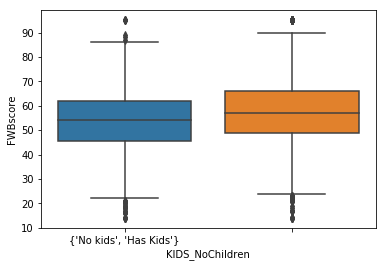

In [124]:
# EDA
# Plot charts comparing the FWBscore against the different socio-economic groupings

#Whether or Not participants have children
ax = sns.boxplot(x="KIDS_NoChildren", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1])
ax.set_xticklabels([{"No kids", "Has Kids"}])
plt.show()

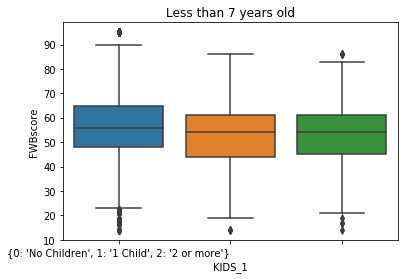

In [125]:
#_ = eda_df.plot(x="FWBscore", y=["EMPLOY1_1_1.0", "EMPLOY1_2_1.0", "EMPLOY1_3_1.0", "EMPLOY1_4_1.0", "EMPLOY1_5_1.0", "EMPLOY1_6_1.0", "EMPLOY1_7_1.0",
#                    "EMPLOY1_8_1.0"], kind="bar")
#_ = sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax = sns.boxplot(x="KIDS_1", y="FWBscore", data=dc_df)
plt.title("Less than 7 years old")
ax.set(xticklabels=[{0: "No Children", 1: "1 Child", 2: "2 or more"}])
plt.show()




[[Text(0, 0, "{0: 'No Children', 1: '1 Child', 2: '2 or more'}")]]

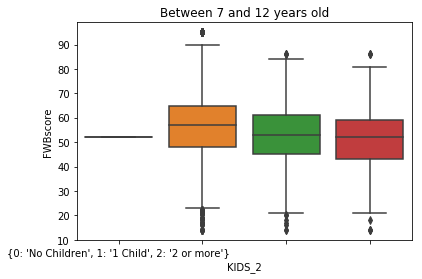

In [126]:
ax = sns.boxplot(x="KIDS_2", y="FWBscore", data=dc_df)
plt.title("Between 7 and 12 years old")
ax.set(xticklabels=[{0: "No Children", 1: "1 Child", 2: "2 or more"}])

[[Text(0, 0, "{0: 'No Children', 1: '1 Child', 2: '2 or more'}")]]

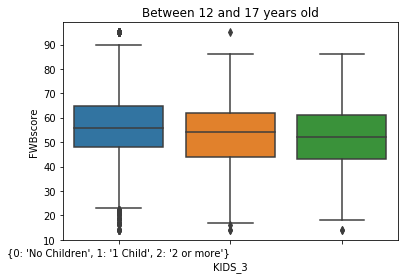

In [127]:
ax = sns.boxplot(x="KIDS_3", y="FWBscore", data=dc_df)
plt.title("Between 12 and 17 years old")
ax.set(xticklabels=[{0: "No Children", 1: "1 Child", 2: "2 or more"}])

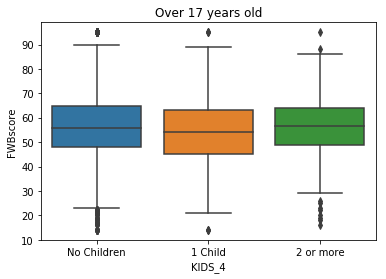

In [128]:
ax = sns.boxplot(x="KIDS_4", y="FWBscore", data=dc_df)
plt.title("Over 17 years old")
ax.set(xticks=[0, 1, 2])
ax.set(xticklabels=["No Children", "1 Child", "2 or more"])
plt.show()

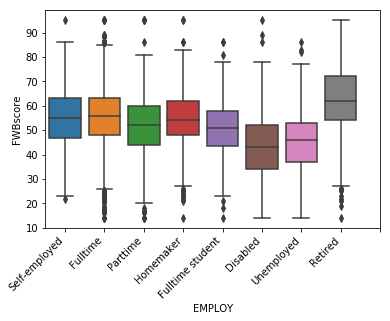

In [129]:
# Employment
ax = sns.boxplot(x="EMPLOY", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(["Self-employed", "Fulltime", "Parttime", "Homemaker", "Fulltime student", "Disabled", "Unemployed", "Retired"], rotation=45, ha='right')
plt.show()

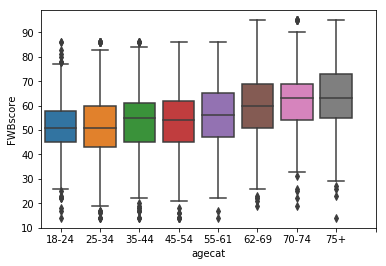

In [130]:
# Age Category
ax = sns.boxplot(x="agecat", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(["18-24", "25-34", "35-44", "45-54", "55-61", "62-69", "70-74", "75+"])
plt.show()

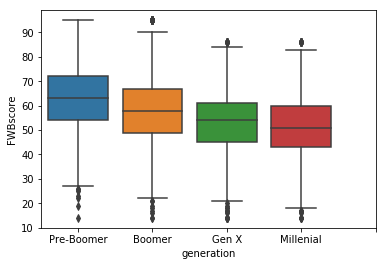

In [131]:
# Generation
ax = sns.boxplot(x="generation", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4])
ax.set_xticklabels(["Pre-Boomer", "Boomer", "Gen X", "Millenial"])
plt.show()

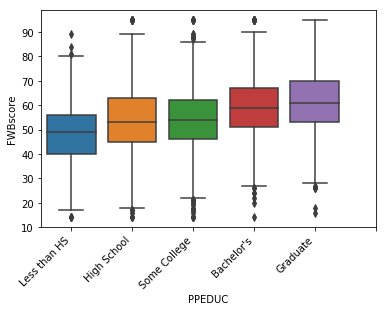

In [132]:
# Participant Education Level
ax = sns.boxplot(x="PPEDUC", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["Less than HS", "High School", "Some College", "Bachelor's", "Graduate"], rotation=45, ha='right')
plt.show()

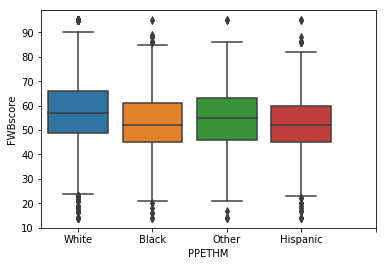

In [133]:
# Participant Ethnicity
ax = sns.boxplot(x="PPETHM", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4])
ax.set_xticklabels(["White", "Black", "Other", "Hispanic"])
plt.show()

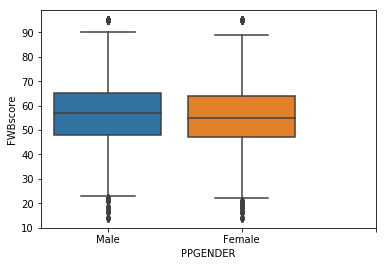

In [134]:
# Participant Gender
ax = sns.boxplot(x="PPGENDER", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2])
ax.set_xticklabels(["Male", "Female"])
plt.show()

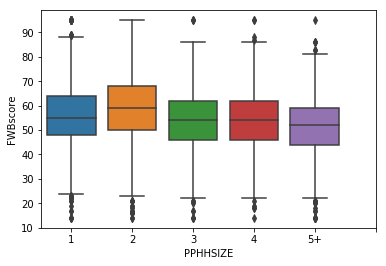

In [135]:
# Participant Household Size
ax = sns.boxplot(x="PPHHSIZE", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["1", "2", "3", "4", "5+"])
plt.show()

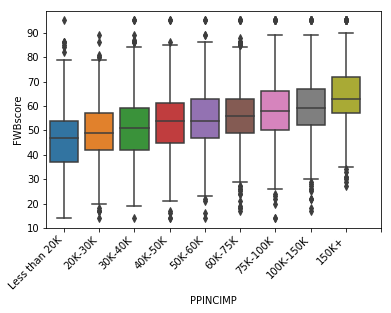

In [136]:
# Participant Income
ax = sns.boxplot(x="PPINCIMP", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(["Less than 20K", "20K-30K", "30K-40K", "40K-50K", "50K-60K", "60K-75K", "75K-100K", "100K-150K", "150K+"], rotation=45, ha='right')
plt.show()

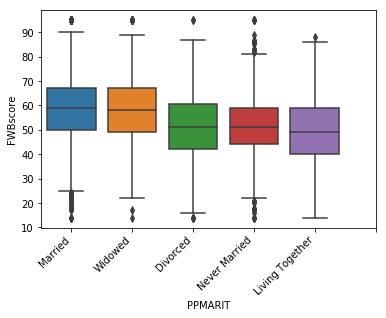

In [137]:
# Participant Maritial Status
ax = sns.boxplot(x="PPMARIT", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["Married", "Widowed", "Divorced", "Never Married", "Living Together"], rotation=45, ha='right')
plt.show()

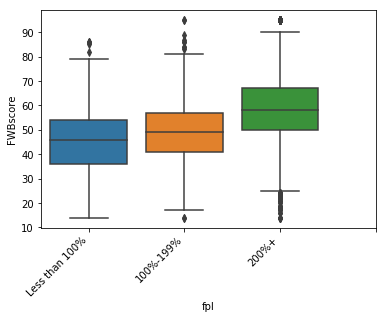

In [138]:
# Percent of Federal Poverty Line
ax = sns.boxplot(x="fpl", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3])
ax.set_xticklabels(["Less than 100%", "100%-199%", "200%+"], rotation=45, ha='right')
plt.show()

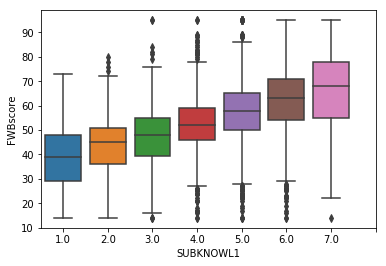

In [139]:
#Compare Financial literacy categorical variables to FWB score
#SBKNOWL1: Participant selected financial knowledge assessment
ax = sns.boxplot(x="SUBKNOWL1", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7])
# ax.set_xticklabels(["Less than 100%", "100%-199%", "200%+"], rotation=45, ha='right')
plt.show()

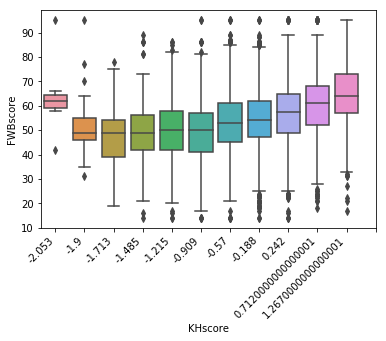

In [140]:
#KHscore: Knoll and Houts financial literacy test score
#NOTE: Though the test is administered as a continuous variable, for the sake of the survey the results have been compiled into a discrete variable.
# the values of the scores are essentially from low financial knowledge to high financial knowledge
ax = sns.boxplot(x="KHscore", y="FWBscore", data=dc_df)
ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.xticks(rotation=45, ha='right')
plt.show()

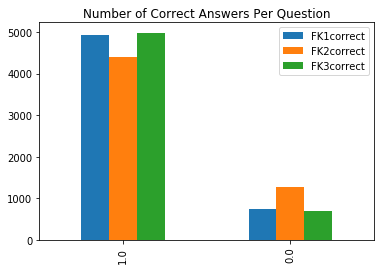

In [141]:
#FK1Correct - FK3Correct: The proportion of correct answers to a financial literacy questionnaire
FKCorrect_df = dc_df[["FK1correct", "FK2correct", "FK3correct"]].copy()
FKCorrect_df.apply(pd.value_counts).plot(kind='bar', title='Number of Correct Answers Per Question')
ax.set(xticks=[1, 0])
ax.set_xticklabels(["Correct", "Incorrect"])
plt.show()
#FKCorrect_df

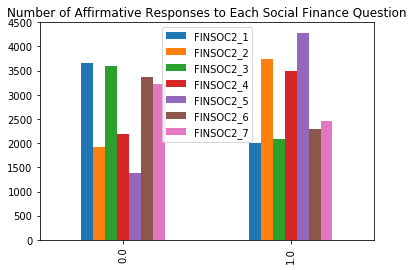

In [142]:
#FINSOC2_1 - FINSOC2_7: Financial knowledge either gained or passed on to members of the participants' social circle
FINSOC_df = dc_df[["FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", "FINSOC2_5", "FINSOC2_6", 
            "FINSOC2_7"]].copy()
FINSOC_df.apply(pd.value_counts).plot(kind='bar', title='Number of Affirmative Responses to Each Social Finance Question')
plt.show()

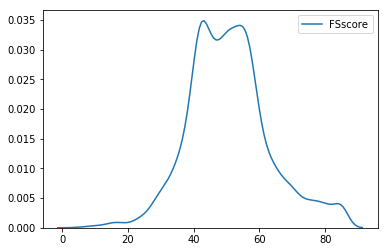

In [143]:
#FSscore
ax = sns.kdeplot(dc_df["FSscore"])
plt.show()

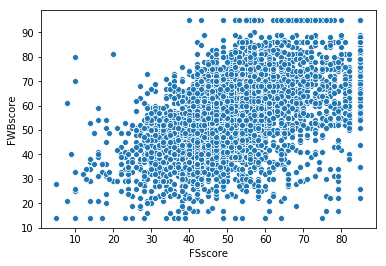

In [144]:
# FSscore
# Pearson correlation
ax = sns.scatterplot(x="FSscore", y="FWBscore", data=dc_df)
plt.show()

In [0]:
# Pearson correlation
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [146]:
pearsonr(dc_df.FWBscore, dc_df.FSscore)

(0.4954809467219192, 0.0)

In [147]:
print(eda_df.columns)

Index(['FWBscore', 'FSscore', 'KHscore', 'FK1correct', 'FK2correct',
       'FK3correct', 'KH1correct', 'KH2correct', 'KH3correct', 'KH4correct',
       ...
       'PPINCIMP_8.0', 'PPINCIMP_9.0', 'fpl_1.0', 'fpl_2.0', 'fpl_3.0',
       'PPMARIT_1.0', 'PPMARIT_2.0', 'PPMARIT_3.0', 'PPMARIT_4.0',
       'PPMARIT_5.0'],
      dtype='object', length=165)


In [148]:
# Feature Comparison and Selection
# Seperate target variable from features
# Drop features with high p-values
y = eda_df.FWBscore
drop = ["FWBscore", "KH1correct", "KH2correct", "KH4correct", "KH5correct", "KH6correct", "KH7correct", "KH8correct", "KH9correct", "FS1_1_1.0", 
       "FS1_1_2.0", "FS1_1_3.0", "FS1_1_4.0", "FS1_1_5.0", "FS1_2_1.0", "FS1_2_2.0", "FS1_2_3.0", "FS1_2_4.0", "FS1_2_5.0", "FS1_3_1.0", 
        "FS1_3_2.0", "FS1_3_3.0", "FS1_3_4.0", "FS1_3_5.0", "FS1_4_1.0", "FS1_4_2.0", "FS1_4_3.0", "FS1_4_4.0", "FS1_4_5.0", "FS1_5_1.0", 
        "FS1_5_2.0", "FS1_5_3.0", "FS1_5_4.0", "FS1_5_5.0", "FS1_6_1.0", "FS1_6_2.0", "FS1_6_3.0", "FS1_6_4.0", "FS1_6_5.0", "FS1_7_1.0", 
        "FS1_7_2.0", "FS1_7_3.0", "FS1_7_4.0", "FS1_7_5.0", "FS2_1_1.0", "FS2_1_2.0", "FS2_1_3.0", "FS2_1_4.0", "FS2_1_5.0", "FS2_2_1.0", 
        "FS2_2_2.0", "FS2_2_3.0", "FS2_2_4.0", "FS2_2_5.0", "FS2_3_1.0", "FS2_3_2.0", "FS2_3_3.0", "FS2_3_4.0", "FS2_3_5.0", "SUBKNOWL1_1.0",
        "KHscore_-0.188", "KIDS_1_0.0","KIDS_2_0.0","KIDS_3_0.0","KIDS_4_0.0", "EMPLOY1_1_0.0", "EMPLOY1_2_0.0", "EMPLOY1_3_0.0", "EMPLOY1_4_0.0", "EMPLOY1_5_0.0", "EMPLOY1_6_0.0", 
        "EMPLOY1_7_0.0", "EMPLOY1_8_0.0", "generation_1.0", "PPEDUC_1.0", "PPETHM_1.0", "PPGENDER_1.0", "PPHHSIZE_1.0", "PPINCIMP_1.0", 
        "PPMARIT_1.0", "KHscore", "agecat_1.0", "agecat_2.0", "agecat_3.0", "agecat_4.0", "agecat_5.0", "agecat_6.0", "agecat_7.0", "agecat_8.0", 
        "fpl_1.0", "fpl_2.0", "fpl_3.0"]
x = eda_df.drop(drop, axis = 1)
x.corr()

,FSscore,FK1correct,FK2correct,FK3correct,KH3correct,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,KIDS_NoChildren,SUBKNOWL1_2.0,SUBKNOWL1_3.0,SUBKNOWL1_4.0,SUBKNOWL1_5.0,SUBKNOWL1_6.0,SUBKNOWL1_7.0,KHscore_-0.57,KHscore_-0.909,KHscore_-1.215,KHscore_-1.485,KHscore_-1.713,KHscore_-1.9,KHscore_-2.053,KHscore_0.242,KHscore_0.7120000000000001,KHscore_1.2670000000000001,KIDS_1_1.0,KIDS_1_2.0,KIDS_2_-3.0,KIDS_2_1.0,KIDS_2_2.0,KIDS_3_1.0,KIDS_3_2.0,KIDS_4_1.0,KIDS_4_2.0,EMPLOY1_1_1.0,EMPLOY1_2_1.0,EMPLOY1_3_1.0,EMPLOY1_4_1.0,EMPLOY1_5_1.0,EMPLOY1_6_1.0,EMPLOY1_7_1.0,EMPLOY1_8_1.0,generation_2.0,generation_3.0,generation_4.0,PPEDUC_2.0,PPEDUC_3.0,PPEDUC_4.0,PPEDUC_5.0,PPETHM_2.0,PPETHM_3.0,PPETHM_4.0,PPGENDER_2.0,PPHHSIZE_2.0,PPHHSIZE_3.0,PPHHSIZE_4.0,PPHHSIZE_5.0,PPINCIMP_2.0,PPINCIMP_3.0,PPINCIMP_4.0,PPINCIMP_5.0,PPINCIMP_6.0,PPINCIMP_7.0,PPINCIMP_8.0,PPINCIMP_9.0,PPMARIT_2.0,PPMARIT_3.0,PPMARIT_4.0,PPMARIT_5.0
FSscore,1.000000,0.105956,0.077807,0.046363,0.122963,0.157808,0.165997,0.140446,0.170478,0.180571,0.107526,0.137228,0.009489,-0.195840,-0.264346,-0.254439,0.094748,0.322449,0.342004,-0.057542,-0.091045,-0.068256,-0.017545,-0.019977,-0.006801,0.019098,0.004401,0.080986,0.164951,0.003025,0.028556,-0.000834,-0.023292,-0.013176,-0.003177,-0.040034,-0.023276,0.013770,0.033811,0.024200,-0.040185,-0.024695,-0.029826,-0.099427,-0.091476,0.077826,0.024843,-0.029056,-0.027078,-0.109040,-0.023318,0.089495,0.135421,0.002026,-0.016176,-0.065682,-0.066407,0.068230,-0.038322,-0.009292,-0.045238,-0.081471,-0.074989,-0.029031,-0.022867,0.002743,0.025515,0.066364,0.161444,-0.006265,-0.067131,-0.088460,-0.013975
FK1correct,0.105956,1.000000,0.183819,0.113048,0.179349,0.023617,0.068640,0.009168,0.065544,0.092737,0.045323,0.084064,-0.030585,-0.052454,-0.046400,-0.052378,0.051030,0.074651,0.012987,-0.078058,-0.104035,-0.089920,-0.121798,-0.087328,-0.087974,-0.076337,0.069775,0.131290,0.115623,0.009227,0.019121,-0.034496,-0.008374,-0.000050,-0.009761,-0.006093,-0.007917,0.023628,0.007971,0.073282,-0.007290,-0.042594,-0.007474,-0.061770,-0.066557,0.008811,0.008209,0.006790,-0.034612,-0.136126,-0.009142,0.109311,0.102402,-0.098788,0.001175,-0.048245,-0.109704,0.044053,0.010179,0.009249,-0.050673,-0.042992,-0.024813,-0.014077,-0.002186,0.017987,0.036790,0.066685,0.099085,-0.008634,-0.026061,-0.059690,-0.035346
FK2correct,0.077807,0.183819,1.000000,0.252047,0.332345,-0.019351,0.064267,-0.012809,0.019431,0.095006,0.016057,0.073750,0.045876,-0.008992,-0.054530,-0.059899,0.045629,0.073518,-0.003727,-0.076825,-0.247058,-0.310665,-0.275277,-0.215252,-0.128621,-0.065375,0.202383,0.246721,0.185351,-0.061315,-0.037098,-0.024696,-0.059388,-0.022693,-0.019067,-0.029259,0.020064,0.026476,-0.022541,0.035157,-0.037487,-0.081696,-0.070392,-0.075215,-0.069902,0.132797,0.119322,-0.038140,-0.178104,-0.124275,-0.030328,0.120398,0.142275,-0.166973,-0.008144,-0.113620,-0.129380,0.090096,-0.006372,-0.062986,-0.089019,-0.068360,-0.050224,-0.024127,0.008237,0.022275,0.061688,0.082897,0.102301,0.012579,-0.002095,-0.119810,-0.088028
FK3correct,0.046363,0.113048,0.252047,1.000000,0.241010,0.002174,0.043104,-0.013151,0.017342,0.064796,0.005991,0.057970,0.004594,-0.047053,-0.054794,-0.021329,0.051915,0.048639,-0.036315,-0.062176,-0.123744,-0.141977,-0.103417,-0.105129,-0.029217,-0.094609,0.091031,0.142755,0.114050,-0.003439,-0.021240,-0.035740,-0.008018,-0.021901,0.000237,-0.013633,0.008108,0.004592,-0.012616,0.068206,-0.026269,-0.067415,-0.031053,-0.061018,-0.060043,0.037470,0.045014,0.002686,-0.071830,-0.114330,-0.003842,0.111942,0.096909,-0.100659,-0.002079,-0.112396,-0.070445,0.065822,-0.014653,0.017604,-0.077741,-0.073416,-0.055315,-0.014851,-0.001328,0.038851,0.041390,0.074462,0.092246,-0.026576,-0.040188,-0.071057,-0.017318
KH3correct,0.122963,0.179349,0.332345,0.241010,1.000000,0.032622,0.097946,-0.003162,0.051529,0.123651,0.057568,0.132467,0.023525,-0.049332,-0.056484,-0.058187,0.063224,0.087070,-0.006800,-0.175384,-0.288108,-0.255050,-0.210355,-

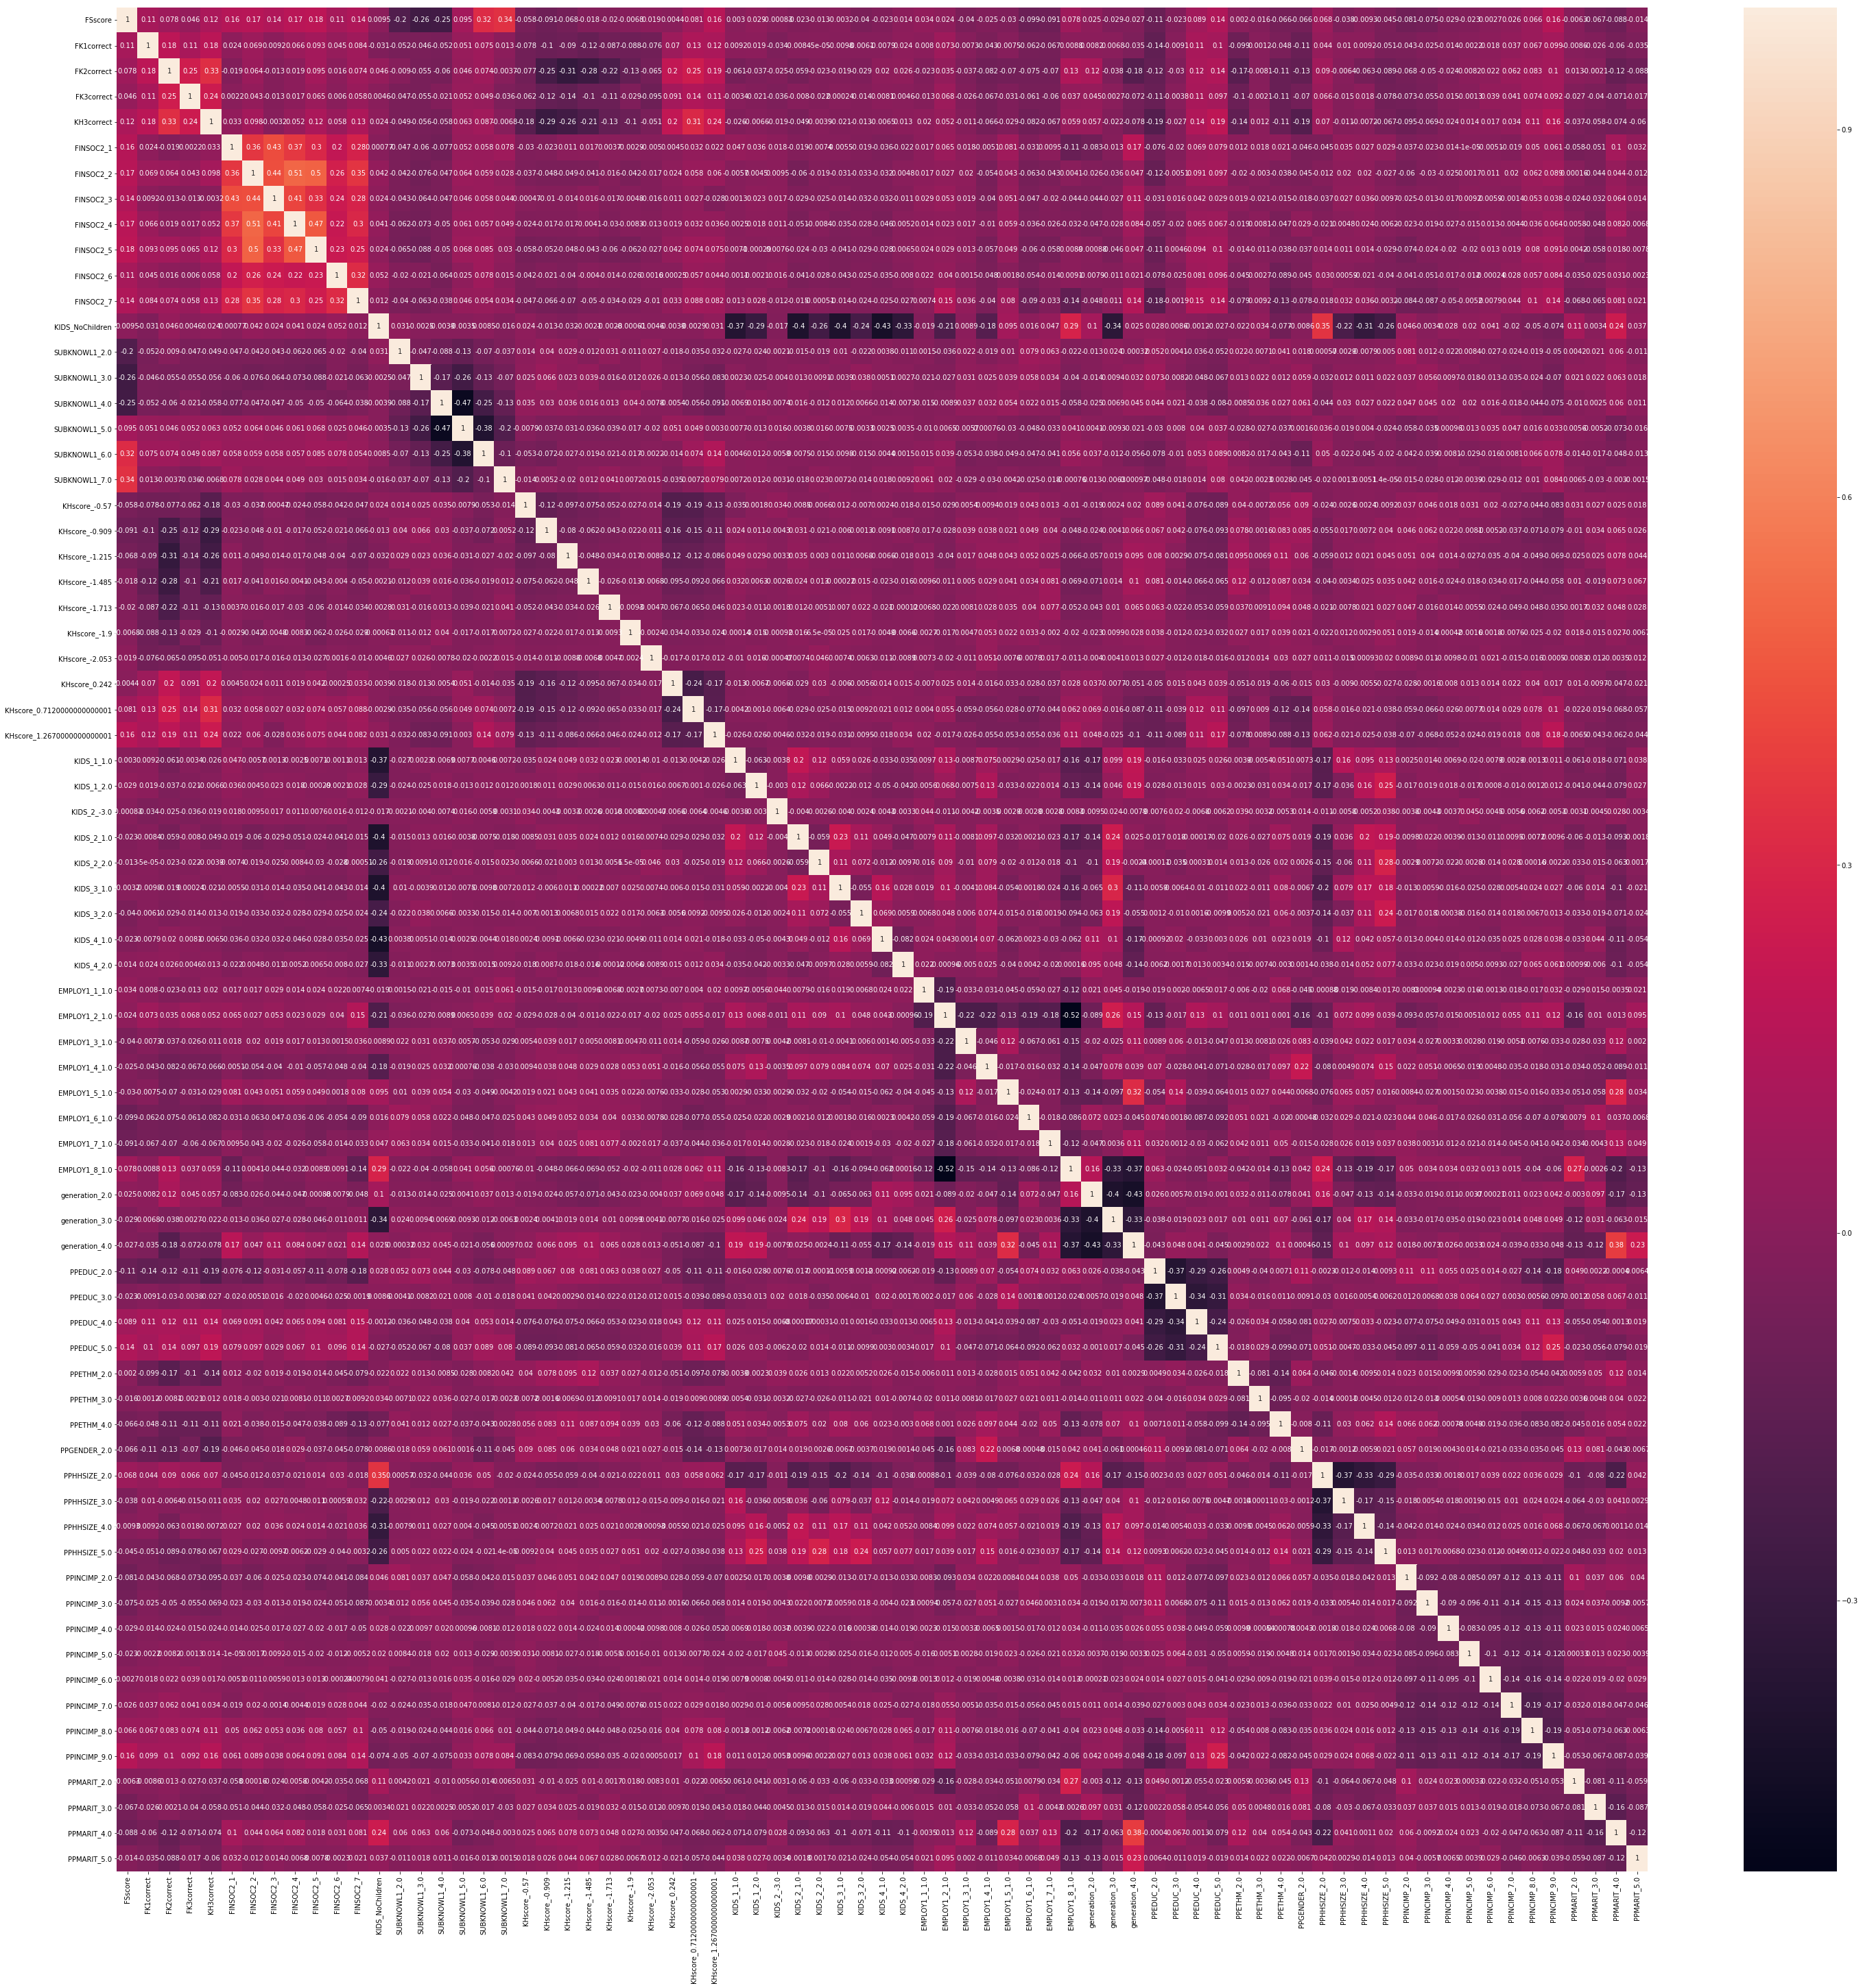

In [149]:
ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(x.corr(), annot=True)

In [0]:
#Normalize X for feature extration
normalized_X = ((x-x.min())/(x.max()-x.min()))

In [0]:
#Split data into train-test
x_train, x_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=42)

In [188]:
# Statsmodel OLS to find the p-values of the variables. 

model = sm.OLS(y_train, x_train).fit()
# predictions = model.predict(x_train) 

print_model = model.summary()
print(print_model)

# Predict
y_pred = model.predict(x_test)

# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))

                                 OLS Regression Results                                
Dep. Variable:               FWBscore   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1573.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):                        0.00
Time:                        04:13:09   Log-Likelihood:                         -14952.
No. Observations:                3969   AIC:                                  3.005e+04
Df Residuals:                    3896   BIC:                                  3.051e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [0]:
# Extract features with p-values less than 0.05; do regression again to compare results
x_1 =eda_df[["FSscore", "FK3correct", "KH3correct", "KIDS_NoChildren", "SUBKNOWL1_2.0", "SUBKNOWL1_3.0", "SUBKNOWL1_4.0", "SUBKNOWL1_5.0", 
             "SUBKNOWL1_6.0", "SUBKNOWL1_7.0", "KIDS_1_1.0", "KIDS_1_2.0", "KIDS_4_2.0", "EMPLOY1_2_1.0", "EMPLOY1_3_1.0", "EMPLOY1_4_1.0", 
             "EMPLOY1_8_1.0", "generation_3.0", "generation_4.0", "PPEDUC_2.0", "PPEDUC_3.0", "PPETHM_4.0", "PPGENDER_2.0", "PPINCIMP_2.0", 
             "PPINCIMP_3.0", "PPINCIMP_4.0", "PPINCIMP_5.0", "PPINCIMP_6.0", "PPINCIMP_7.0", "PPINCIMP_8.0", "PPINCIMP_9.0"]].copy()

In [0]:
#Normalize X for feature extration
normalized_X_1 = ((x_1-x_1.min())/(x_1.max()-x_1.min()))

In [0]:
#Split data into train-test
x_1_train, x_1_test, y_train, y_test = train_test_split(normalized_X_1, y, test_size=0.3, random_state=42)

In [193]:
#Fit model with revised test-train data
model = sm.OLS(y_train, x_1_train).fit()

print_model = model.summary()
print(print_model)

# Predict
y_pred = model.predict(x_1_test)

# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))

                                 OLS Regression Results                                
Dep. Variable:               FWBscore   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              3647.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):                        0.00
Time:                        04:18:13   Log-Likelihood:                         -15003.
No. Observations:                3969   AIC:                                  3.007e+04
Df Residuals:                    3938   BIC:                                  3.026e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [200]:
# Linear Regression

lr = LinearRegression()

lr.fit(x_1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
# Predict
y_pred = model.predict(x_1_test)

# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))

#r2_score(x_tra, y_pred) 

# r-squared training data
print("R-squared training data ", lr.score(x_1_train, y_train))

# r-squared testing data
print("R-squared testing data ", lr.score(x_1_test, y_test))

11.12770567463889
R-squared training data  0.45419477497652416
R-squared testing data  0.3906772477064281


In [0]:
# Ridge Regression
ridgemodel = Ridge()
alphas = []
scores = []
for i in [0, 1e-6, 1e-4, 1e-2,.1, 1, 5, 10, 20, 30, 50, 100,200,300,400,500,750, 1000]:
    
    pipe = Pipeline([
                 ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha= i))
            ])
    score = cross_val_score(pipe, x_train, y_train, cv = 5)
    for x in score:
        scores.append(x)
        alphas.append(i)
ridge_frame = pd.DataFrame({'alpha': alphas, 'score': scores})
top_alpha = ((ridge_frame.groupby('alpha', as_index=False).mean().
sort_values('score')))
top_alpha = top_alpha.iloc[-1:, 0].values

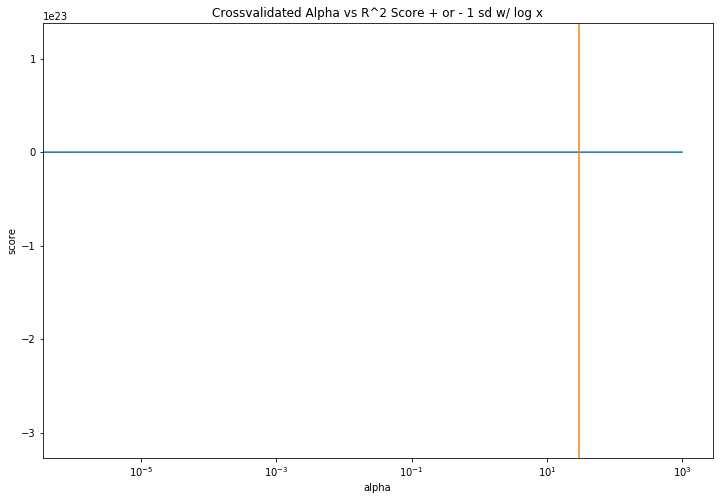

In [172]:
# Plot Ridge to find R-squared

plt.figure(figsize = (12, 8))
sns.lineplot('alpha', 'score', data = ridge_frame, ci = "sd")
plt.title('Crossvalidated Alpha vs R^2 Score + or - 1 sd w/ log x')
plt.axvline(top_alpha, color = "C1")
plt.xscale('log')
plt.show()

In [173]:
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha= top_alpha))
            ])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.4072668541446324

In [0]:
# Neural Network for Regression
network = Sequential()
network.add(layers.Dense(units=32, activation='relu', input_shape=(x_1_train.shape[1],)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1))

In [0]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                metrics=['mse']) # Mean squared error

In [260]:
# Train neural network
history = network.fit(x_1_train, # Features
                      y_train, # Target vector
                      epochs=10, # Number of epochs
                      verbose=2, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(x_1_test, y_test)) # Data for evaluation

Train on 3969 samples, validate on 1701 samples
Epoch 1/10
 - 0s - loss: 122.2209 - mean_squared_error: 122.2209 - val_loss: 134.4913 - val_mean_squared_error: 134.4913
Epoch 2/10
 - 0s - loss: 119.7932 - mean_squared_error: 119.7932 - val_loss: 130.5049 - val_mean_squared_error: 130.5049
Epoch 3/10
 - 0s - loss: 118.5270 - mean_squared_error: 118.5270 - val_loss: 126.8005 - val_mean_squared_error: 126.8005
Epoch 4/10
 - 0s - loss: 116.8742 - mean_squared_error: 116.8742 - val_loss: 127.9387 - val_mean_squared_error: 127.9387
Epoch 5/10
 - 0s - loss: 115.9090 - mean_squared_error: 115.9090 - val_loss: 124.4696 - val_mean_squared_error: 124.4696
Epoch 6/10
 - 0s - loss: 114.7824 - mean_squared_error: 114.7824 - val_loss: 123.5408 - val_mean_squared_error: 123.5408
Epoch 7/10
 - 0s - loss: 113.8429 - mean_squared_error: 113.8429 - val_loss: 124.3524 - val_mean_squared_error: 124.3524
Epoch 8/10
 - 0s - loss: 113.1717 - mean_squared_error: 113.1717 - val_loss: 121.9962 - val_mean_squared_

In [261]:
# Neural Network RSME
print(np.sqrt(112.0882))

10.587171482506553
